# EuroCrops Demo

This notebook assists with exploring the EuroCrops demo dataset.


### Imports

In [1]:
import datetime as dt
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import json

%matplotlib inline

### Load Data

In [2]:
ROOT_DATA_PATH = '/media/data/local/eurocrops/m1615987/'
H5_FILE_PATH = os.path.join(ROOT_DATA_PATH, 'HDF5s/train/AT_T33UWP_train.h5')
REGION_NAME = 'AT112'
LABELS_CSV_FILE_PATH = os.path.join(ROOT_DATA_PATH, f'csv_labels/train/demo_eurocrops_{REGION_NAME}.csv')
GEO_JSON_FILE_PATH = os.path.join(ROOT_DATA_PATH, f'GeoJSONs_regional_split/train/AT/demo_eurocrops_{REGION_NAME}.geojson')


# # Specify dataset path
# dataset_dir = '/home/maja/Documents/2020_EuroCrops/demo_dataset/HDF5'
# # Get all paths
# # test_csv_dir  = os.path.join(dataset_dir, 'test/csv_files/')
# # test_h5_dir   = os.path.join(dataset_dir, 'test/h5_files/')
# train_csv_dir = os.path.join(dataset_dir, 'train/csv_files/')
# train_h5_dir  = os.path.join(dataset_dir, 'train/h5_files/')

# h5_file_path = '/home/maja/hdd8/2020_EuroCrops/demo_dataset/March/HDF5s/AT_T33UWP_testTUM.h5'
# h5_file_path = 'AT_new.h5'

In [3]:
NUMBER_OF_CHANNELS = 13

<h4> Load Data- Alternative </h4>
If for some reason the code above does not work, the alternative solution is as follows:

In [4]:
hdf = pd.HDFStore(H5_FILE_PATH, mode='r') #here we directly load the .h5 file in one go using pandas.
hdf.keys()  #list all the keys or regions in the region (for eg- AT112)

['/AT112',
 '/AT122',
 '/AT123',
 '/AT124',
 '/AT125',
 '/AT127',
 '/AT130',
 '/AT223']

In [5]:
df_data = hdf.get(f'/{REGION_NAME}') #selecting a region from based on the key (AT112 for eg.)

In [6]:
df_data.shape

(6264, 80)

In [7]:
df_data.columns.values

array(['20190106', '20190111', '20190113', '20190116', '20190118',
       '20190205', '20190207', '20190212', '20190215', '20190217',
       '20190220', '20190225', '20190227', '20190307', '20190312',
       '20190314', '20190319', '20190322', '20190324', '20190329',
       '20190401', '20190406', '20190416', '20190418', '20190421',
       '20190428', '20190501', '20190508', '20190518', '20190526',
       '20190531', '20190602', '20190605', '20190607', '20190612',
       '20190615', '20190617', '20190620', '20190625', '20190627',
       '20190630', '20190702', '20190705', '20190715', '20190717',
       '20190720', '20190725', '20190801', '20190804', '20190809',
       '20190811', '20190814', '20190816', '20190819', '20190829',
       '20190831', '20190903', '20190905', '20190908', '20190910',
       '20190913', '20190915', '20190918', '20190920', '20190923',
       '20190930', '20191008', '20191010', '20191013', '20191015',
       '20191018', '20191023', '20191025', '20191107', '201911

In [8]:
df_data.index

Int64Index([   463,    464,    504,    577,    578,    579,    580,    766,
              1143,   1144,
            ...
            968078, 968325, 968464, 968465, 968575, 968580, 968594, 968675,
            968676, 968745],
           dtype='int64', length=6264)

In [9]:
df_data.iloc[0,0]

[3871, 3600, 2992, 3105, 3205, 3320, 3321, 3482, 2042, 107, 2859, 2289, 3352]

In [10]:
df_data

,20190106,20190111,20190113,20190116,20190118,20190205,20190207,20190212,20190215,20190217,...,20191018,20191023,20191025,20191107,20191122,20191129,20191204,20191207,20191224,20191227
463,"[3871, 3600, 2992, 3105, 3205, 3320, 3321, 348...","[1638, 1193, 780, 647, 692, 732, 763, 680, 545...","[1679, 1241, 845, 742, 805, 866, 945, 854, 399...","[2379, 2016, 1670, 1642, 1736, 1883, 1962, 191...","[6992, 6542, 5944, 6414, 6786, 6859, 6973, 674...","[1456, 1079, 767, 673, 737, 796, 851, 772, 472...","[1532, 1260, 930, 802, 856, 938, 987, 1041, 74...","[1511, 1079, 694, 540, 541, 580, 586, 538, 302...","[1442, 1123, 870, 826, 902, 999, 1074, 1010, 5...","[1556, 1172, 916, 862, 934, 1056, 1137, 1059, ...",...,"[3904, 3449, 3165, 3352, 3444, 3684, 3938, 353...","[2046, 1799, 1523, 1490, 1514, 1669, 1786, 175...","[1598, 1252, 998, 944, 1000, 1137, 1244, 1190,...","[1449, 1115, 789, 666, 674, 724, 786, 740, 256...","[3450, 3114, 2883, 3245, 3432, 3793, 4090, 364...","[2450, 2039, 1665, 1577, 1608, 1668, 1691, 160...","[1695, 1244, 889, 708, 763, 913, 966, 912, 343...","[1552, 1127, 692, 473, 442, 437, 421, 370, 159...","[1770, 1294, 898, 732, 802, 954, 1015, 953, 36...","[1608, 1196, 756, 582, 571, 603, 590, 563, 320..."
464,"[2240, 1800, 1329, 1211, 1252, 1340, 1384, 135...","[1640, 1225, 810, 702, 738, 786, 820, 782, 519...","[1706, 1276, 891, 803, 863, 932, 1026, 965, 40...","[2343, 2031, 1696, 1691, 1803, 1964, 2063, 205...","[6337, 5914, 5299, 5647, 5919, 6005, 6108, 598...","[1463, 1113, 804, 734, 781, 838, 889, 868, 472...","[1545, 1152, 866, 789, 853, 915, 977, 962, 704...","[1680, 1296, 974, 977, 1058, 1167, 1265, 1248,...","[1459, 1159, 912, 888, 948, 1029, 1122, 1096, ...","[1571, 1212, 959, 933, 1005, 1100, 1177, 1165,...",...,"[3793, 3735, 3361, 3447, 3420, 3639, 3814, 362...","[3678, 3377, 3097, 3245, 3250, 3393, 3573, 337...","[1633, 1291, 1049, 994, 1063, 1229, 1321, 1281...","[1468, 1113, 788, 656, 680, 750, 802, 734, 275...","[2254, 1874, 1508, 1444, 1453, 1598, 1710, 158...","[2561, 2079, 1706, 1644, 1697, 1768, 1817, 164...","[1713, 1259, 903, 712, 787, 940, 975, 923, 391...","[1586, 1158, 724, 501, 475, 480, 470, 414, 177...","[1780, 1300, 907, 725, 815, 999, 1054, 996, 40...","[1514, 1095, 667, 475, 471, 491, 483, 453, 232..."
504,"[5910, 5689, 5128, 5710, 5977, 6113, 6230, 607...","[2844, 1974, 1535, 1478, 1559, 1660, 1764, 194...","[1912, 1540, 1220, 1198, 1415, 1731, 1954, 198...","[2792, 2502, 2155, 2199, 2368, 2593, 2723, 270...","[5602, 5067, 4545, 4936, 5200, 5297, 5378, 505...","[1495, 1196, 949, 1011, 1179, 1441, 1588, 1637...","[1602, 1302, 1061, 1109, 1286, 1543, 1659, 177...","[1691, 1374, 1150, 1330, 1597, 1885, 2085, 220...","[1533, 1272, 1075, 1157, 1311, 1520, 1707, 175...","[1556, 1267, 1067, 1146, 1356, 1602, 1746, 180...",...,"[4630, 4583, 4288, 4590, 4593, 4882, 5184, 482...","[4727, 4666, 4509, 4925, 4965, 5232, 5543, 530...","[1480, 1140, 1014, 693, 1105, 2526, 2917, 2817...","[1557, 1225, 1029, 830, 1126, 1583, 1722, 1676...","[1607, 1266, 1029, 913, 1117, 1439, 1650, 1631...","[3856, 3464, 3083, 3176, 3292, 3406, 3511, 336...","[1697, 1279, 940, 808, 889, 948, 1058, 954, 44...","[2417, 2532, 2105, 2094, 2171, 2386, 2507, 278...","[1684, 1222, 777, 577, 566, 576, 582, 526, 259...","[3982, 3901, 3152, 3252, 3343, 3377, 3467, 362..."
577,"[5625, 5201, 4547, 4940, 5164, 5247, 5309, 522...","[1723, 1290, 906, 836, 954, 1109, 1171, 1014, ...","[1709, 1298, 962, 950, 1046, 1167, 1280, 1210,...","[2276, 1943, 1650, 1696, 1807, 1978, 2079, 204...","[7665, 7391, 6749, 7382, 7732, 7826, 7955, 783...","[1538, 1219, 968, 1022, 1108, 1236, 1339, 1296...","[1620, 1261, 1038, 1105, 1236, 1375, 1491, 146...","[1455, 1052, 694, 575, 585, 612, 632, 582, 301...","[1584, 1304, 1153, 1285, 1422, 1569, 1711, 167...","[1681, 1349, 1173, 1313, 1472, 1633, 1792, 171...",...,"[4398, 4235, 3956, 4187, 4248, 4693, 5003, 468...","[3466, 3223, 2923, 2978, 2963, 3245, 3439, 329...","[1644, 1293, 1137, 945, 1276, 2370, 27

#### Load the corresponding labels

In [11]:

# csv_file_path = os.path.join(train_csv_dir, csv_file_name)
df_labels = pd.read_csv(LABELS_CSV_FILE_PATH, index_col=0)

### Check out the data

- **Rows**: parcel ID <br>
- **Cols**: timesteps <br>
- **Cells**: 13 representative reflectances (median value) for a parcel, each corresponding to one band of the *SENTIEL-2* Satellites.

In [12]:
df_labels.shape

(6264, 2)

In [13]:
df_labels

,crpgrpc,crpgrpn
recno,,
463,33111022,leguminous_plants
464,33111022,leguminous_plants
504,33111022,leguminous_plants
577,33111022,leguminous_plants
578,33111022,leguminous_plants
...,...,...
968580,33104000,sugar_beet
968594,33104000,sugar_beet
968675,33104000,sugar_beet


### Check out the labels and metadata

- **id**: parcel ID
- **nuts_id**: NUTs-3 region name
- **crop_code**: code corresponding to the given crop name
- **crop_name**: name according to the EAGLE-matrix

In [14]:
df_labels.head()

,crpgrpc,crpgrpn
recno,,
463,33111022,leguminous_plants
464,33111022,leguminous_plants
504,33111022,leguminous_plants
577,33111022,leguminous_plants
578,33111022,leguminous_plants


### Check out the data for one parcel

In [15]:
# The columns of the dataframe correspond to the timesteps
timesteps = list(df_data.columns)

# Pick the first row
example_row = df_data.iloc[0]
parcel_ID = example_row.name

# Get the corresponding label
label_code = df_labels.loc[parcel_ID]['crpgrpc']
label_name = df_labels.loc[parcel_ID]['crpgrpn']

print('{} grows on parcel {}'.format(label_name, parcel_ID))

leguminous_plants grows on parcel 463


### Look at the reflectance data for one parcel

#### Convert the timesteps into relative timestep

In [16]:
# Get the current year by taking the 10th timestep
year = int(timesteps[10][:4])
new_year_day = dt.datetime(year=year, month=1, day=1)


# Subtract current year
tf = '%Y%m%d'
dates_list = [((dt.datetime.strptime(date, tf)- new_year_day).days + 1) for date in timesteps]

#### Extract the row data into a numpy array

In [17]:
example_row = example_row.to_numpy()
example_row = np.stack(example_row, axis=0)

#### Plot the data

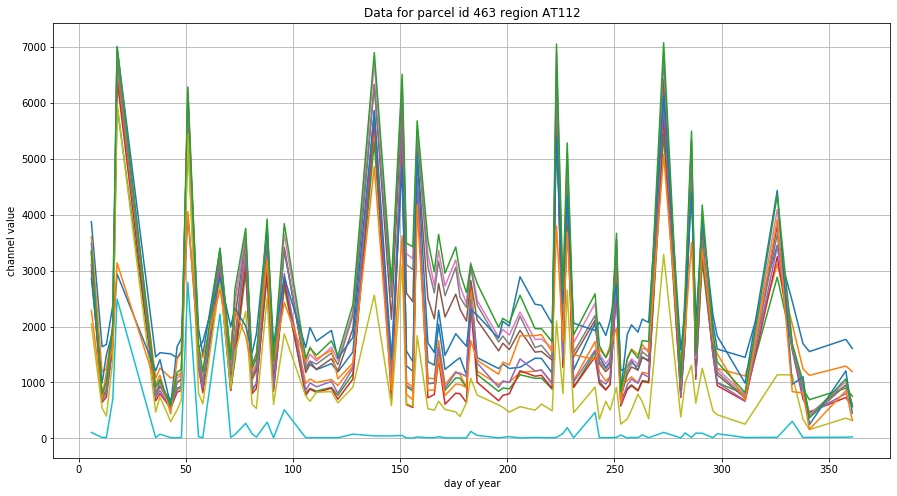

In [18]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(dates_list, example_row)
# plt.legend(bands)
plt.style.use('_classic_test_patch')
plt.xlabel('day of year')
plt.ylabel('channel value')
plt.title(f'Data for parcel id {parcel_ID} region {REGION_NAME}')
plt.grid()

#### Load geojson

In [19]:
with open(GEO_JSON_FILE_PATH, 'r') as file:
    geojson_data = json.load(file)
    
geometry_dict_by_parcelid = {feature['properties']['recno']: feature['geometry'] 
                             for feature in geojson_data['features']}

In [20]:
geojson_data.keys()

dict_keys(['type', 'name', 'crs', 'features'])

In [21]:
geojson_data['crs']

{'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}}

In [22]:
len(geojson_data['features'])

6331

In [23]:
geojson_data['features'][0]

{'type': 'Feature',
 'properties': {'recno': 463,
  'crpname': 'ACKERBOHNEN (PUFFBOHNEN)',
  'crpgrpc': 33111022,
  'crpgrpn': 'leguminous_plants',
  'NUTS_NAME': 'Nordburgenland',
  'org_id': 463,
  'borderParc': 0,
  'use': 'training',
  'r1': 1000462,
  'az_id_org': 1,
  'NUTS_ID': 'AT112',
  'country': 'austria'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[16.423795460623445, 47.82078105997216],
     [16.423021541535473, 47.82090602658277],
     [16.426825139832076, 47.82334122371044],
     [16.42726926945361, 47.82300513488749],
     [16.423795460623445, 47.82078105997216]]]]}}

In [24]:
geometry_dict_by_parcelid[parcel_ID]

{'type': 'MultiPolygon',
 'coordinates': [[[[16.423795460623445, 47.82078105997216],
    [16.423021541535473, 47.82090602658277],
    [16.426825139832076, 47.82334122371044],
    [16.42726926945361, 47.82300513488749],
    [16.423795460623445, 47.82078105997216]]]]}

### Check crop types in the current dataset

In [25]:
%timeit 968745 in df_data.index

921 ns ± 4.86 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [26]:
regions_id_set = set(df_data.index)
%timeit 968745 in regions_id_set

28 ns ± 0.074 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


In [35]:
crop_types_counts = {}
crop_types_ids = {}

for i, region_id in enumerate(df_labels.index):
    if region_id not in regions_id_set:
        continue
        
    crop_name = df_labels.iloc[i]['crpgrpn']
    current_count = crop_types_counts.get(crop_name, 0) 
    crop_types_counts[crop_name] = current_count + 1

    if crop_name not in crop_types_ids:
        crop_types_ids[crop_name] = []
    crop_types_ids[crop_name].append(region_id)

     
print(f'Total crop fields: {sum(crop_types_counts.values())}')
crop_types_counts = {k: v for k, v in sorted(crop_types_counts.items(), key=lambda item: -item[1])}
crop_types_counts

Total crop fields: 6264


{'winter_common_wheat_and_spelt': 1381,
 'pasture_meadow': 985,
 'grain_maize': 766,
 'soya': 600,
 'other_plants_harvested_green': 395,
 'vineyards': 366,
 'sunflower_and_yellow_bloomer': 244,
 'winter_barley': 244,
 'others': 215,
 'leguminous_plants': 156,
 'sugar_beet': 151,
 'winter_triticale': 113,
 'fresh_vegetables_melons_and_strawberries': 102,
 'winter_rye': 74,
 'winter_rape': 67,
 'millet': 66,
 'winter_durum_wheat': 65,
 'summer_durum_wheat': 64,
 'summer_barley': 47,
 'other_cereals_for_the_production_of_grain': 46,
 'fruit_of_temperate_climate_zones': 34,
 'cucurbits': 21,
 'potatoes': 19,
 'summer_common_wheat_and_spelt': 17,
 'not_known': 8,
 'other_industrial_crops_not_mentioned_elsewhere': 6,
 'aromatic_plants_medicinal_and_culinary_plants': 5,
 'nuts': 3,
 'summer_oats': 2,
 'other_oil_seed_crops': 1,
 'arable_land_seed_and_seedlings': 1}

In [36]:
selected_crop_names = [
    # 'nuts',  # 'millet'
    'sugar_beet',
    'sunflower_and_yellow_bloomer',
    'soya',
    'millet',
    'grain_maize',
    'pasture_meadow',
]



def get_data_for_crop_type(crop_name):
    data = np.zeros(shape=(len(crop_types_ids[crop_name]), len(dates_list), NUMBER_OF_CHANNELS), dtype=float)
    for i, region_id in enumerate(crop_types_ids[crop_name]):
        region_data = df_data.loc[region_id].to_numpy()
        data[i, ...] = np.stack(region_data)
    return data
    
    
selected_crops_data = [get_data_for_crop_type(crop_name) for crop_name in selected_crop_names]

In [37]:
print(f'{selected_crops_data[0].shape} = [fields (for the crop), time (dates_list), channels (bands B0-B12)]')

(151, 80, 13) = [fields (for the crop), time (dates_list), channels (bands B0-B12)]


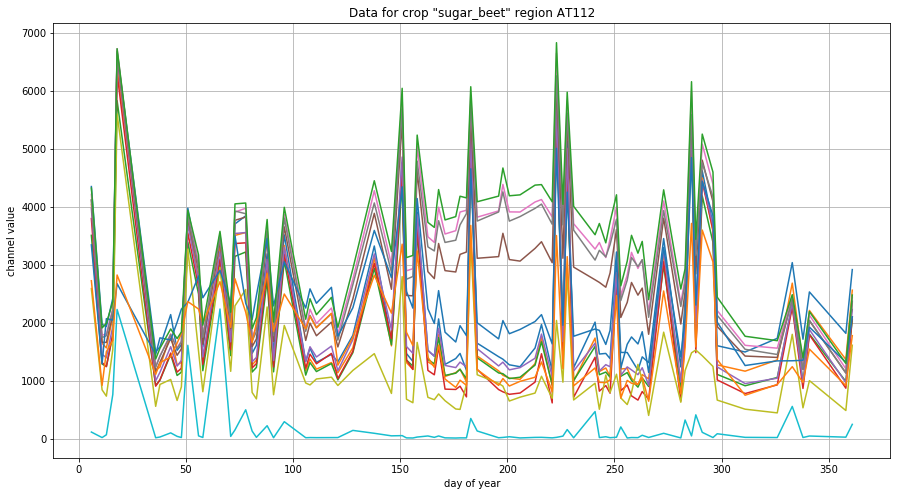

In [38]:
crop_index = 0

data_crop_x = selected_crops_data[crop_index]
data_crop_x_mean = np.mean(data_crop_x, axis=0)
data_crop_x_std = np.std(data_crop_x, axis=0)


plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(dates_list, data_crop_x_mean)
# plt.legend(bands)
plt.style.use('_classic_test_patch')
plt.xlabel('day of year')
plt.ylabel('channel value')
plt.title(f'Data for crop "{selected_crop_names[crop_index]}" region {REGION_NAME}')
plt.grid()





In [39]:
from dataclasses import dataclass


@dataclass
class CropNdviData:
    mean: np.ndarray
    std: np.ndarray

        
def get_ndvi_data(data_crop) -> CropNdviData:
    """
    data_crop: [fields (for the crop), time (dates_list), channels (bands B0-B12)]')
    return: mean and std for ndvi "channel"
    """
    
    # B8-B4 / (B8+B4)   ( counting from B1 to B13)
    B4 = data_crop[:, :, 4-1]
    B8 = data_crop[:, :, 8-1]

    data_crop_ndvi = (B8 - B4) / (B8 + B4)
    data_crop_mean_ndvi = np.mean(data_crop_ndvi, axis=0)
    data_crop_std_ndvi = np.std(data_crop_ndvi, axis=0) 
    
    return CropNdviData(mean=data_crop_mean_ndvi, std=data_crop_std_ndvi)
    

In [40]:
selected_crops_ndvi_data = [get_ndvi_data(crop_data) for crop_data in selected_crops_data]



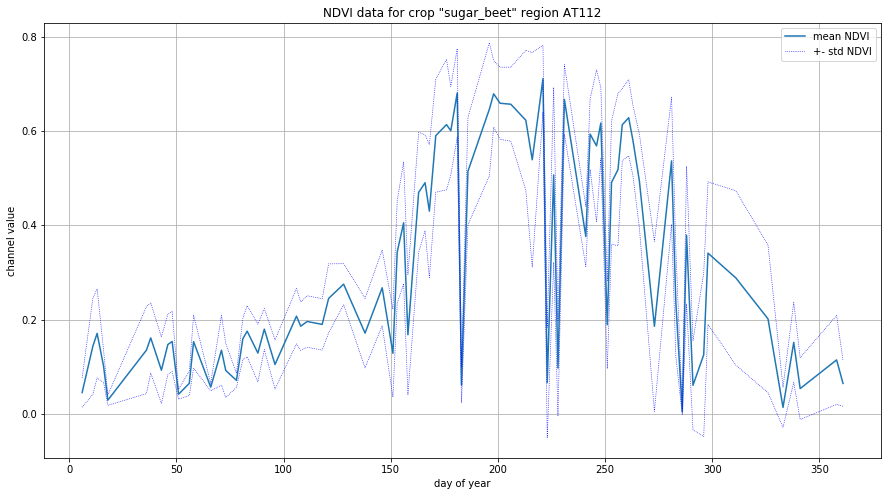

In [41]:
crop_index = 0

data_crop_x_mean_ndvi = selected_crops_ndvi_data[crop_index].mean
data_crop_x_std_ndvi = selected_crops_ndvi_data[crop_index].std


plt.rcParams['figure.figsize'] = [15, 8]
plt.plot(dates_list, data_crop_x_mean_ndvi)
plt.plot(dates_list, data_crop_x_mean_ndvi - data_crop_x_std_ndvi, ':', color='b', linewidth=0.7)
plt.plot(dates_list, data_crop_x_mean_ndvi + data_crop_x_std_ndvi, ':', color='b', linewidth=0.7)

# plt.legend(bands)
plt.style.use('_classic_test_patch')
plt.xlabel('day of year')
plt.ylabel('channel value')
plt.title(f'NDVI data for crop "{selected_crop_names[crop_index]}" region {REGION_NAME}')
plt.grid()
plt.legend(['mean NDVI', '+- std NDVI'])

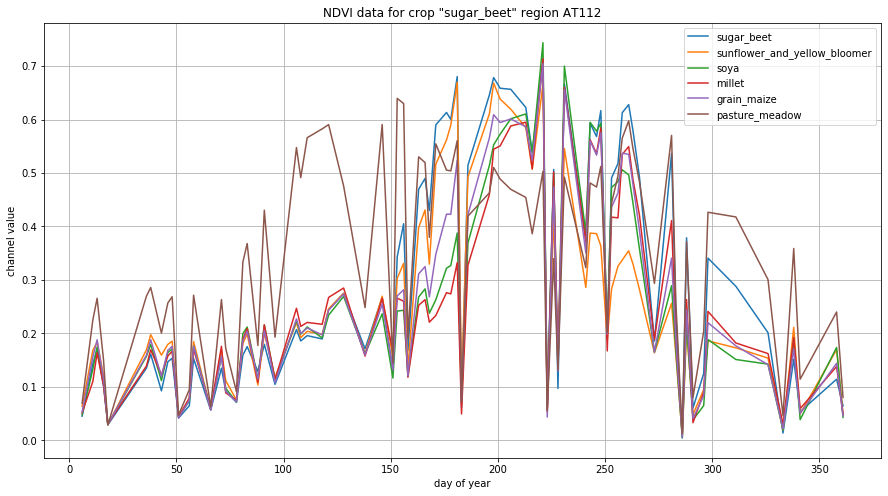

In [42]:
plt.rcParams['figure.figsize'] = [15, 8]

for crop_ndvi_data in selected_crops_ndvi_data:
    plt.plot(dates_list, crop_ndvi_data.mean)

# plt.legend(bands)
plt.style.use('_classic_test_patch')
plt.xlabel('day of year')
plt.ylabel('channel value')
plt.title(f'NDVI data for crop "{selected_crop_names[crop_index]}" region {REGION_NAME}')
plt.grid()
plt.legend(selected_crop_names)